# An Actual-vs-Predicted Fancy Plotter hued with LCZ Classes

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
from utilities.lcz_utils import (
    convert_LCZ_num_to_class,
    load_LCZ_class_palette,
    get_LCZ_order,
)
from utilities.plot_utils import plot_pred_vs_actual

### Define plotting data (actual and predicted values, LCZ numerical codes and regression scores)

In [2]:

# ---> Data
data = pd.DataFrame(
    {
        "y_actual": [284.0, 287.0, 291.0, 295.0, 298.0, 302.0, 304.0, 310.0],
        "y_pred": [285.0, 286.0, 290.0, 296.0, 300.0, 304.0, 305.0, 308.0],
        "LCZ": [100100, 100123, 110200, 100123, 100456, 100456, 110700, 110200],
    }
)
scores = {
    r"$R^2$": 1 - (
        ((data["y_actual"] - data["y_pred"])**2).sum() /
        ((data["y_actual"] - data["y_actual"].mean())**2).sum()
    ),
    r"$\mathrm{RMSE}$": np.sqrt(((data["y_pred"] - data["y_actual"])**2).sum() / len(data.index))
}

### Convert LCZ numerical codes to classes and get a QGIS-specific LCZ palette

In [3]:
# Absolute path to the directory of the current script
curr_dir = os.getcwd()

# Map LCZmajority numerical codes in the predicted DataFrame into classes
data["LCZ"] = convert_LCZ_num_to_class(
    data["LCZ"],
    mapper_file_path=os.path.join(curr_dir, "assets/json/LCZ_num_to_class.json"),
)
# Get color palette for the LCZ classes
LCZ_class_to_palette = load_LCZ_class_palette(
    mapper_file_path=os.path.join(curr_dir, "assets/json/LCZ_class_to_palette.json"),
)

# Define list of unique LCZ classes in the predicted DataFrame ordered as in the map
hue_order = get_LCZ_order(
    data["LCZ"],
    LCZ_kind="class",
    mapper_file_path=os.path.join(curr_dir, "assets/json/LCZ_num_to_class.json"),
)

### Plot

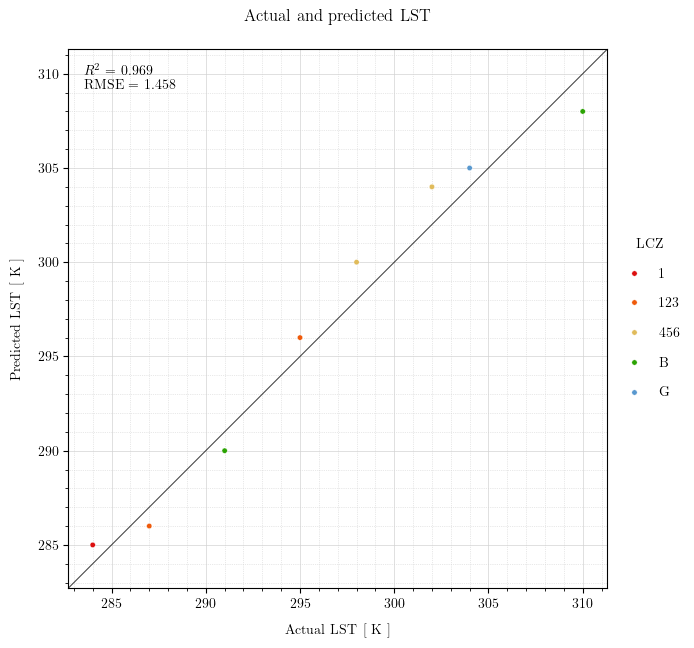

In [4]:
# ---> Plot
plot_pred_vs_actual(
    df=data,
    col_actual="y_actual",
    col_pred="y_pred",
    col_hue="LCZ",
    hue_title_fancy=r"$\mathrm{LCZ}$",
    hue_order=hue_order,
    hue_palette=LCZ_class_to_palette,
    target_title_fancy=r"$\mathrm{LST}$",
    target_units_title_fancy=r"$\mathrm{K}$",
    scores=scores,
    use_hue=True,
    print_scores=True,
)